In [8]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import random
import time
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

In [12]:
path = 'C:\\Users\\Yoganand\\Desktop\\bank-additional-full.csv'
data = pd.read_csv(path, ',')
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
data.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

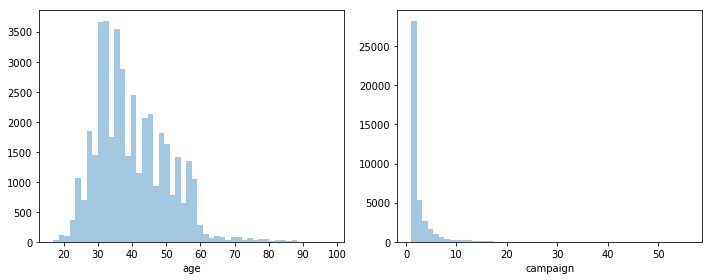

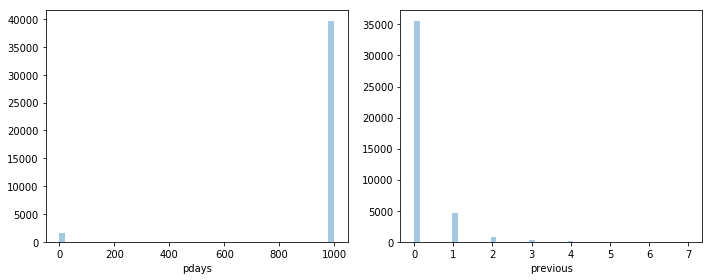

In [21]:
num_cols = ['age', 'campaign', 'pdays', 'previous']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(data[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(data[num_cols[i]], kde=False)

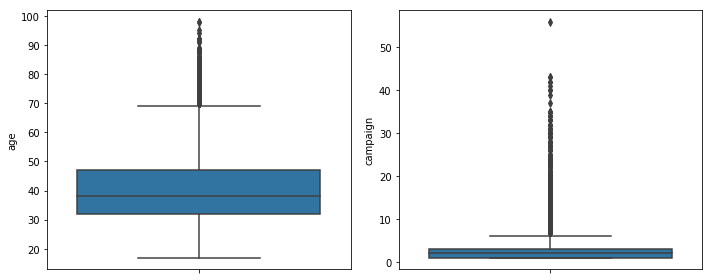

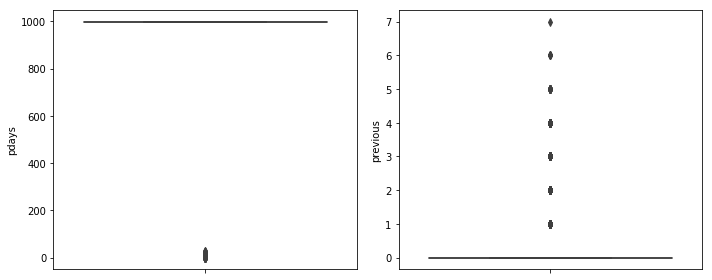

In [22]:
facet = None
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = data)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = data)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = data)

TypeError: Could not convert nononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesnonononoyesnonononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnononononononononononononononononononononononoyesnononononononononononononoyesnononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononoyesnonononononononononononononononononoyesnononoyesnonononononononononononononononononoyesnononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononoyesnononononononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononoyesnononononononononononononononononononononononononononononoyesnononononononononoyesyesnononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnononoyesnonoyesnononononononononononononononononononoyesnonononoyesnononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnonononononononononoyesnononononononoyesnononononononononononoyesnononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononoyesnononononononononononononononononononoyesnononononononononononononononoyesnononoyesnononononononononononononononononononononononononononononononononononoyesnonononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnonoyesnonononononononononoyesnononononononononononononononononononononononononononononononoyesnonononononononoyesnonononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononoyesnononoyesnonononononononononononononononononoyesnoyesnononoyesnononoyesnoyesnononononononononononononononononononononononononononononononoyesnononononononononononononononononononoyesnonononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnononononononoyesnononononononoyesnononoyesnonononononononononononononononononononononononononononononononononononoyesnononononoyesnononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononoyesnonononononononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnonoyesnononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnononoyesnononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononoyesnonononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononoyesnononononononononononoyesnonononononononononononononononoyesnononononononononononononononononononoyesnonononoyesnonononononononononononononononoyesnononononononononononononononononononononononononoyesnonononononononononononononononoyesnonononononononononononononoyesnonononononononononononononononoyesnononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononoyesnononononononoyesnonononononononononononononononononoyesnonoyesnoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononoyesnononononononononononononononononononoyesnonononononononononononononononononononononononononononoyesnonononononononononononononononoyesnonononononononononoyesnonononononononononononononononononononononoyesnonononoyesnononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononoyesnononononononononononononononoyesnonononononononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnononononononononononononononononononoyesnonononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononoyesnonononononononononononononononoyesnoyesnononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesnononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesnoyesnonononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononoyesnononononononononononononononononononoyesnononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononoyesyesnonononononononononononononononononononononoyesnonononononononononononononononononoyesnononononononononononononoyesnononononononononononononononoyesnonononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononoyesnononononononoyesnonononononononononononononoyesnonononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononoyesnoyesnonononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononoyesnononononononononononononononononononononoyesyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononoyesnonononononoyesnonononononononononononononoyesnononononononononononononononononoyesnonononononoyesyesnonononononononononononononononononononononononoyesnonononoyesnonoyesnononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnononononoyesnonononoyesnononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononoyesnonononononoyesnononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnononononoyesnoyesnononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononoyesnononononoyesnonoyesnoyesnononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononoyesnonononoyesnonononononononononononononononononononononononononononononononononononoyesnononononononoyesnononononononononononononononoyesnonononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnononononononononononononononononononononononononononononoyesnonoyesnononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononoyesnonononoyesnonononoyesnoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnononononononononononoyesnononononononononononononoyesyesnononononoyesnonononononoyesnononononononononononononononononononononononononoyesnononononononononononononononononononononononononononoyesnonoyesnononoyesnononoyesnononononononononoyesnononoyesnononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnononoyesnonononoyesnononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononoyesnononononononononononononoyesnonononononononoyesnononononoyesyesnonononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononoyesnononononononononononononononononononononononononoyesnonononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesnonononononononononononononononononononononononononononononononononononononoyesnonononononoyesyesnonononononononononoyesnononononononononononononononononononononononoyesnonononononononononononononononoyesnononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononoyesnonononononononononononononononononononononononoyesnonononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonoyesnonononononononononononononononononononononononoyesnononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnonononononononononononononoyesnonononononononononononononononononononononononononononoyesyesnonononononononononoyesnonononononononononononononononononononononononononononononononononononononononoyesnononononononoyesnonoyesnonoyesnononoyesnonoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononoyesnonononononononononononononoyesnononononononononononoyesnonononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnononononononononoyesnonononononononononononoyesyesnononoyesnonononononononoyesnonononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnononononononoyesnonononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnoyesnonononononononononononononononononononononononononononononononoyesnonononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononoyesnoyesnoyesnonononononononononononoyesnonononononononoyesnonononononononononononononononononoyesnonoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnonononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononoyesnonononononononoyesnononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononoyesnoyesnoyesnonononononononononononononononononononononononononononononoyesnononoyesnononoyesnononononononononononononononononononononononononoyesnononononononononononononononononononononononoyesnonononononononononoyesnonononononononononononononononononoyesnonononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonoyesnonononononononononoyesnonononononononononoyesnonononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononoyesyesnoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononoyesnonononoyesyesnonononononononononononononononononononoyesnonononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononoyesnonoyesnonoyesnononononononononononononoyesnonoyesnononoyesnonononononononononoyesnononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononoyesnononononononoyesyesnononononononononononononononononononoyesnonononononononononononononoyesnononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnonoyesyesnononononononononoyesnononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononoyesnoyesnonononononononononononononononononoyesnononononoyesnononononononononoyesnoyesnononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesyesnoyesnononononononononononononononononononononononononononononononononononononoyesnononononononoyesnononononononononononononononononononononoyesnonoyesnonoyesnonononoyesyesnononononononononononononononononononononononononononononononononoyesnonononoyesnononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononoyesnonoyesnononononononononononononononononoyesnonononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesyesnononononononononononononononononoyesnononononononononononononononononoyesnonoyesnonoyesnononononononononononononoyesnonoyesnonononononononononononononononoyesnononononononononononononoyesnonononononononoyesnononononononononoyesnoyesnonononononononoyesnonononononononononononononononoyesnononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesyesnononononononononononononononononononononononononononoyesnonononoyesnonononononononononoyesnononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnonoyesnonoyesnonononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnonoyesnononononononononononononononononononononononononononoyesyesnonononoyesyesnonononononoyesnonononononononononononononononononononononononononoyesnonononononononononoyesnonononononoyesnonononoyesnononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononoyesnonononononoyesnonononononononononononononononononoyesnonoyesnonononononononononoyesnonononononononononononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononononoyesnonononononononononoyesnonononononononoyesnononononononononononononononononononononononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononoyesnonononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononoyesnonononoyesnononoyesyesnononononononononononononononoyesyesnonononoyesnoyesnonoyesnononononononononononoyesnononononononononononononononononononononononononononononononononononononononoyesnonoyesnonononononoyesnononononononoyesnonononononononononononoyesnononononononononononononoyesnoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononoyesnononononononononononononoyesnoyesnonononononononononononononononononoyesyesnonononoyesnonoyesnononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononoyesnoyesnonononoyesyesnononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnoyesnononononononononononononoyesnononononononononononononononononononononononononoyesnononononononononononononononoyesnonononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononoyesnonononononononononoyesnononononononononononononononononononononononononoyesnononononononononononononononononononononononononononoyesnononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnoyesnonoyesnononononononononoyesnononononononononononononononononononononononononononoyesnonononononononoyesnononononononononononononononononononononononoyesyesnononononononononononononononononononononoyesnononononoyesnonononononononoyesyesnononoyesyesyesnononoyesnononononononononononononononoyesnonononononononononononononoyesnononononoyesnonononononononononononononononononononononononononononononononononononononononononononoyesnoyesnononoyesnonononoyesnononononononononononononononoyesyesnonononononononononononononononoyesnonononononononononononononononoyesnonononononononoyesnononononononoyesnononononononononononononononononononononononoyesyesyesnononononoyesnononononononoyesnoyesnononononononononoyesnononononoyesnonononononoyesnonononononononononononononononononononoyesnonononononononononononononoyesnonononononoyesnononononononoyesnonononoyesnononoyesnononoyesnonononononononononononononononononononononononononoyesnonononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnonononononononononoyesnonononoyesnoyesnonononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesnonoyesnononoyesyesnononononononononononononoyesnoyesnononoyesnononoyesnononononononononononononononononononononononononononoyesnononononononononononononononononononononoyesnonononononononononononononononononononononononoyesnononononononononononononononononononononoyesyesnoyesnonononononononononononononononononononononononoyesyesyesnonononononoyesnononoyesnonononononononononoyesnononononononononoyesnonononononononoyesnonononononoyesnonononononononoyesnonononononoyesnonononononononononononononononononoyesnonononononononononononononononononononoyesnoyesnononoyesnononononononononononononononononoyesnononoyesnonononononoyesnononoyesnonononononononoyesnoyesnononononononononononononoyesnonononononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnoyesnonononononononononononononoyesnonononoyesnonoyesnononononononononononononononononononononononoyesnonononononononononononononononononononononononononononoyesnonononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononoyesnonononononononononononononononononoyesnonononononononononononoyesnononoyesyesnonononononononoyesnonononoyesnononononoyesnonononoyesnononoyesnoyesnonoyesnononononononononononononoyesnononononononononononoyesnononononononoyesnononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononoyesyesnononoyesnonononononononononononononononoyesnonononononononononononoyesnononononononononoyesnonoyesnonononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononoyesnonononononononononononoyesnononononononononononononoyesnonononononononononoyesnoyesnononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnonononoyesnonononononononononoyesnononononononononononononononononoyesnonononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononoyesnonononoyesnononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnonononononononononoyesnononononononononononoyesnononononononononononononononononononononononononononononononononononononononononoyesyesnononononononononononononononononononononononononononononononononononononoyesnonononononoyesnononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononoyesnonononononononononononononononononononononoyesnononononononononononononononononononononononononononoyesnonononononononononononononoyesnononononononononononononononononoyesnononononoyesnononononononoyesnononononononononononononononononononoyesyesnoyesnonononononononoyesnononononononononononononononoyesnoyesnonononononononononononononononononoyesnoyesnonononoyesnonononononononononoyesnonononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnonononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesnonononononononononononononononoyesnonononononononononononononononononononononononononononononononoyesnonoyesnoyesnonononoyesnonononononononononononononononononononononononononononononononoyesnononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononoyesyesnonononononononoyesnonononononononononoyesnonononononononononononononoyesnononoyesnonononononononoyesnonononoyesnoyesnonoyesnononononononononononononononoyesnononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononoyesnonoyesnonononononononononononononononononononononononoyesnononononononononononononononononononoyesnonoyesnonononononoyesnononononononononoyesnonononononoyesnonononoyesnononononononononononononononoyesyesnononononononononononononononononononononononononononononononononononononononononononononoyesnonononoyesyesnonononononoyesnonononoyesnonononoyesnonononononononoyesnononononononoyesnonononononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnoyesnonononoyesnononoyesnonononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnonononononononononononononononononononononoyesnononononoyesnonononononononononononoyesnononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonoyesnononononononononononononononononononononononononoyesnononononononoyesnonononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnononononononononoyesnonononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnoyesnonononononononononononoyesnononononononononononononononononoyesnonoyesnononoyesnonononononononononononononononoyesnonoyesnononononononononoyesnononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnonononoyesnonoyesnonononononononononononononononoyesnononoyesnononoyesnonononononononononononononononoyesnononononononononononoyesnonononononononoyesnonononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnononononononoyesyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononoyesyesnononononononononononononononononononononononononononononononononononononoyesnonononononononononononononoyesnoyesnonononononononononononononononoyesnonononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonoyesnonononononononononoyesyesnononoyesnonononoyesyesnonononononoyesnononononoyesnonononononononononononononoyesnonononoyesnononononononononononononononoyesnonononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnonononononoyesnononononoyesnonononononononoyesnononononononononononononononononononononoyesnoyesnonononononononononononononoyesnonononononoyesnonononononononoyesnonononononononononoyesnonoyesnononononoyesnononoyesnonononononononononononoyesnononononononononononononononoyesnonononononoyesnonoyesnonononoyesnonononononononononononononononononononononoyesnonononoyesnonononononononononononononononononononoyesnonononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnonononoyesyesnononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononoyesnoyesyesnonononononononoyesnonononononononononononononononononononononoyesnonoyesnononononononoyesnonononononononononononononononononononononononononononoyesnononononoyesnonoyesnonononononoyesyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnonononononononononononononononononononononononononononoyesnononoyesnononononononononononononoyesnonononononononononononononononononononononononononononononoyesnononoyesyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnononononoyesnononononononononononononononononononononononononononononononononononoyesnononononoyesnononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesnononononoyesnononononononononononononononononoyesnononoyesnonononononononononononoyesnoyesnonononoyesnonononoyesnonononononononononononononononononoyesyesnonononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnononononononononononononononononoyesnonononononononononononononoyesnonononononononononononononononononononononononononoyesnononononononononononononononononononoyesnoyesnonononoyesnonononononononoyesnononononononononononononononononononononononoyesnoyesnonononononononononononononononoyesnononoyesnononoyesnononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnoyesnononononononononononoyesnonononononononononononoyesnononononononononoyesnonononononononononononononononononononononononoyesnonoyesnononononononononoyesnononononononononononononoyesnononononononononononononononononoyesnonononononononononononoyesnononononononononononoyesnonononononononononononoyesnononononononononononononononononononononononononononononoyesnoyesnononononononononononoyesnonononoyesnonononononononononononoyesnonononononononoyesnoyesnoyesnonoyesnononoyesnononoyesnoyesnonoyesnonononononoyesnoyesnononononononononononononononononoyesnonoyesnonononononoyesnoyesnononononononononononononononononononononononononononononononononononononononoyesnonononoyesnonoyesnoyesyesnononononoyesnononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononoyesnoyesnononononononoyesnonononononoyesyesnononononononoyesnoyesnonononononononoyesnononononononoyesnononononoyesnonononononononononononononononoyesnononononoyesnononoyesnonononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesnononononononononononononononononononoyesnonononononoyesnoyesnonononononoyesnononononononononononononononononononononononoyesnononononononoyesnonononononononononononononononononononononoyesyesnononononononononononononononononononononononononononoyesnonononoyesnoyesyesnoyesnonononononoyesyesnononononononononononononononononononoyesnononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononoyesnonononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesnononononononononononononoyesnononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnononononoyesnononononononononononononononononoyesnononononononoyesnonoyesnononononononononononononononononononononononononononononoyesnonononononononononononononononononoyesnonononononononononononononononononoyesnononononononononononononononononononononononononononononononononoyesnonononononoyesnonononononoyesnononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnonononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnononononononononononononononononononononoyesnononononoyesnononononononononononononononononononononoyesnononononononononononononoyesnoyesnonononononononononononononononononononononononononononononoyesnoyesnonononononononononononononononononononoyesnononononononononononononononononononononononononononononononononoyesnononononononononononononoyesnonononononononononononononononoyesnonononononononononononononononononononononononononononononononononoyesnonononononononononoyesnonononononononononononononononononoyesyesnoyesnonononononononoyesnononononononononononononononononononoyesnonononononononononononononononononononononononononoyesnononononononoyesnononononononononoyesnonononononononononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnonononononononononononononononononononononononononononoyesnonononononononoyesnonononononononononononononononononoyesnonoyesnononononononononononononononononoyesnononononononononononononononononononoyesnononononononononononononononoyesnonononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononoyesyesnonononononononononononononononoyesnononoyesyesnononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononoyesnononononononononononononononoyesnononononoyesnononononononononoyesnononononononononononononononononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononoyesnoyesnonononononononononononononononononononononononoyesnonoyesnononononononononononononononononononononononononononoyesnononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononoyesnononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesnonoyesnononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesyesyesyesnononoyesnononoyesnoyesyesnoyesyesyesyesnoyesnonoyesnoyesyesnoyesyesyesnoyesyesyesnoyesnoyesyesnoyesnoyesnoyesnoyesyesyesyesyesyesnoyesnoyesyesyesyesyesnoyesyesnononononoyesnononoyesyesnoyesnonoyesyesyesnonoyesnoyesnoyesyesnononononoyesnoyesnononoyesyesyesyesnononononononononononoyesyesnoyesyesnoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononoyesnoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnonononononononononononononoyesnononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnononononononononononononononononoyesnononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononoyesnononononononononononononononononononononononononoyesnoyesnononononononoyesnononononoyesnononononononononononononononononononononononononononononononononononononononoyesyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnonononononononononononononononononononononoyesnononononononononononoyesnonononononononononononononononononononononononononoyesnoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesyesyesnononononononononononononononononononononononononononoyesnonononononononoyesyesnononononononoyesnononoyesnonononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesyesnonononononononononononononononoyesnonononononononononononononononononoyesnonononononononononononoyesnononononoyesnononononononononononononononononononononoyesnonoyesnononoyesnonoyesnonononononoyesyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononoyesnonoyesnononononononononononononononoyesnonononononononononononononononononononononoyesnononononononononoyesnonononononononononoyesnononononononoyesnoyesnonononononononononononononononononoyesnonononononononononononoyesnononononononononononononononononononononoyesnonononononononononononoyesnononononononononononoyesnononononoyesnonoyesnononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnonononononononononononononononononoyesnononononononoyesnonononononononononononononononononononononononononononononononononononoyesnonononononoyesyesnononononoyesnononononononononononoyesnononononoyesnonononononononononononononononoyesnononoyesnononononononononononononononoyesnonononononononononononononoyesnononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononoyesnononononononononononononononononononoyesnonononoyesnonononononononononononononononononononononononononononononononononononononononoyesnononoyesnononononononoyesnonononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononononoyesnonononononononononononoyesnoyesnonononoyesnonononononononononoyesnononononononoyesnononononononoyesnonononononononononoyesyesnonononononononononononononononononononononoyesnononononononononononononononoyesnonoyesnonononononononononononoyesnonoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononoyesyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononoyesnonononoyesnononononononoyesyesnonononononononononononononononononononononononononononononononoyesnonononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononoyesnononononoyesnonononononononononononononononononononoyesyesyesnoyesnononononononononononononoyesnoyesnoyesyesnonononononononononononononononononononononononononononononononononononononononononononononoyesnonoyesnononononoyesyesnonononononononononononononononoyesnonoyesnonononononononononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnononononononononononononoyesnononononononononononononononononononononononononononononononoyesnononononoyesyesnononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononoyesnononononoyesnonononononononononoyesnonononononononononoyesnonononononononononononononononononononononononononononononononononoyesnonoyesyesnonononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononoyesnononononononononononononononononononononoyesnononononoyesnonononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesyesyesnononononoyesyesnoyesnononoyesnonoyesyesnonoyesnoyesnononoyesyesnonoyesnoyesnoyesyesnonoyesyesyesyesyesyesnoyesyesyesnononoyesnononoyesnoyesnonoyesnoyesyesnononoyesyesyesnonoyesyesyesyesyesyesyesnonoyesnononononoyesnonoyesyesnoyesnonoyesnoyesyesnonononoyesnoyesnonononoyesyesnoyesnoyesnonoyesyesnoyesnonoyesyesyesnonoyesyesyesyesyesnoyesnonononoyesyesnonoyesnononononononononoyesnonoyesyesyesyesyesnoyesyesnononononoyesyesyesnoyesyesyesnoyesnonoyesyesnoyesnoyesnoyesnonoyesnonononoyesnoyesyesyesyesnoyesyesyesyesyesnoyesnonoyesnonononononoyesnonononoyesyesyesyesnoyesnoyesnoyesnonononoyesnoyesnoyesnonoyesnononoyesyesyesnoyesnonononononoyesyesnoyesnonoyesnononoyesyesnonononononoyesnonoyesnononononononononoyesnononoyesyesnononononoyesnonononononononoyesnonononoyesnonononononononoyesnonononoyesnononononononononononononononoyesnonononoyesnonoyesnononononononoyesnononononononononononononoyesnonononononononononononononoyesnoyesnonononononononononononononononononononononononononononoyesnonononononononoyesnonononononononoyesnononoyesnononononononononononononononononononoyesnononononoyesnonononoyesyesyesnononononononoyesnonononoyesnononononononononoyesnononononononononononoyesnonoyesnonononononoyesnonononononononoyesnonononononononononononononononononononononoyesnononononononononononononoyesyesnonononononononoyesnoyesnononononoyesnonononononononononononononoyesnonoyesyesnononononononoyesnonoyesnononoyesnonoyesnononononoyesnononononononononononononononoyesyesnonononononononoyesnonoyesnoyesnoyesnonoyesnononononononononononononononoyesnonononoyesnoyesyesnononononoyesnonononononononononononoyesnononoyesnoyesyesnononononoyesnononoyesyesnonononoyesnononononononoyesnonoyesnonoyesnononononononononononoyesnonononononoyesnononoyesnonononononoyesnoyesyesyesnonononononoyesnonoyesyesnoyesnoyesnoyesyesnononononoyesnonoyesyesnonoyesnononoyesyesyesnonoyesnoyesnononononoyesyesyesnonononononononoyesnononononononoyesnoyesnonoyesyesyesyesnononononononononononononononononononononononononoyesnoyesnononoyesyesnoyesyesnonononoyesnoyesnoyesnoyesnoyesnonoyesyesnoyesnonoyesnononononononononoyesnononononononononoyesyesnoyesyesyesnonoyesyesnoyesnononoyesnoyesnonononononononononononononononononononononononononononononononononoyesnononononononononononononononononononoyesnonononoyesnononononononononononononoyesnonononononononoyesnoyesnononononoyesnonononononononoyesnoyesnonononononononoyesnononononononononononononoyesnonononononononononononononoyesnononononononononononononononononononononononoyesnononononononononononononononononononononononononoyesnononononononoyesnoyesnonononononononononononononononononononononononononononoyesnonoyesnonononoyesnononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononoyesnononononononoyesnonononononononoyesnonononononononononononononononononoyesnononoyesnonononononononononoyesnonononononononononononononononononononononononononononononononoyesnononononononoyesnononononononononononoyesnononononononoyesnonononononononononononononononoyesnononononononoyesnonononononononononoyesnonononononoyesnonoyesnonononononononononononononononononoyesnononononononononoyesnonononononononononononononononononononononononononononononoyesnonononononononoyesnononononoyesnononononononoyesnononononononononononononononononononononoyesnononononoyesnoyesnononononononoyesnonononononoyesnonoyesnonononononononononononononononononononononononononoyesnononononononononoyesnonononononononononoyesnononoyesnononoyesnoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononoyesyesnoyesnononoyesnononononononononononononononononoyesyesnonononononononononononoyesnonononononononoyesnononononononoyesnononononoyesyesnonononononononononononoyesnonononononononononoyesnonononononononononononononononononoyesyesnonononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnonoyesnonononononononononoyesnononononononononononoyesnononononononononononononononoyesnononoyesnononononononononononononononononononononoyesnononononononoyesnonononononononononononoyesyesnonononononononononononononononononononononononononononononononononononononoyesnoyesnononoyesnonononononononononononoyesnononononononoyesnononononoyesnonononononononononononononononononononononononoyesnononoyesnonononononononononononononoyesnonononononononoyesnononoyesnoyesnononononoyesyesnonononononononononononononononononoyesnononoyesnononononononononononononononononononoyesnononoyesnonononononononononononoyesnononononononononononoyesnonoyesyesnoyesnoyesnonononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesyesyesyesnonononoyesyesyesyesyesnononoyesyesnoyesyesnonononoyesnononoyesnoyesyesyesyesyesyesyesyesyesnonononononononoyesyesyesyesyesnoyesnoyesnoyesyesnoyesyesyesyesyesnoyesnonoyesyesyesnononoyesyesyesyesyesyesnonononoyesyesnoyesyesyesnonoyesnoyesnononoyesnonononononoyesnonononoyesyesyesnononononoyesnonoyesnononoyesyesnononoyesnononoyesnonononononoyesnononononoyesyesyesnononononononononononoyesyesyesyesnonoyesyesyesyesnoyesnonoyesnoyesyesnononoyesnononoyesyesyesnoyesnononononoyesyesnononoyesnoyesyesyesyesnoyesyesnoyesyesyesyesyesnoyesyesyesnononoyesyesnoyesyesnoyesnoyesyesnononoyesnoyesyesnoyesnonoyesnoyesyesyesyesnonoyesnonononononoyesyesnoyesyesyesyesnoyesnonononoyesnononoyesnonononoyesyesnonononononoyesnononononononoyesnoyesnonoyesyesnonoyesnonononoyesyesyesnoyesnoyesyesnoyesyesnoyesnonoyesnononoyesyesyesnononononoyesyesyesyesnoyesnoyesnonoyesnonoyesyesnonoyesnonoyesyesnoyesnononoyesyesnoyesnonoyesyesnoyesnonoyesnoyesnononononoyesyesnoyesyesyesyesnonoyesyesnoyesnononoyesnonononoyesnononononoyesnononononoyesnononoyesnonoyesyesnoyesyesyesnoyesyesnoyesyesyesnonoyesyesyesyesnonoyesyesnonoyesyesnoyesnononoyesnononononoyesnoyesyesnoyesnoyesnonononononoyesnoyesyesyesnoyesnononoyesyesnoyesyesyesyesnonoyesyesnonoyesyesyesnononononononononononononoyesnonoyesnonoyesnonoyesyesnononoyesyesnononononononononononononoyesnonononononononononononoyesnononononoyesnonononononoyesnoyesnononononoyesnonononoyesnononononononononoyesnonoyesnononoyesyesnononononononoyesnononoyesyesnonoyesnoyesnoyesnoyesnonoyesyesnoyesnonononononononoyesnononoyesnonononoyesnoyesnononononoyesnononononononoyesnonoyesnononononoyesnonononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnoyesnononoyesyesyesnonoyesnoyesnononononononononoyesnononononononononononononononoyesnonononononononoyesnonononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononoyesyesnonononononononoyesnonononononononononononononononononoyesnonononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnonononoyesnononononononononononononononononononononononoyesnononononononononononoyesnonononononononononononononoyesyesnononononononononononononononononoyesnoyesnononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononoyesnononononononononononononononoyesyesnonononononononononononoyesnononononononononononononononoyesnonoyesnononononononononononononononononoyesnononononononononononononononononononononononoyesnoyesnonononononononononononononoyesnoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononoyesnononononononononononoyesnonononononononononononononoyesnonononononononononononononononononoyesnonononononononononononononoyesnonononononononononononononoyesnononononononononoyesnononononononononononononononononononononononononononononononoyesnonoyesnonononononononononononononononononononononononononononononononoyesnononoyesnonoyesnonononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononoyesnononoyesnononononononononononononononononononononononononononononononononononoyesnononononoyesyesnonononononononononoyesnonononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononoyesnonononoyesyesnonononononoyesnonononononononononononononononononononononononononononononononononoyesnoyesnonoyesnononononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononoyesnonononononononononononononononoyesnonononononononononononononoyesnononononononononoyesnonononononononononononoyesnononononononononononononononononononononononononononononononononononononoyesnonoyesnonononoyesnononononononononoyesnonononononononononoyesnononononononononononononononononononononononononononononononononononoyesnonononononoyesnonononoyesnonononononononononononononononononononononononononononononononononononoyesnonoyesnonononoyesnononononononoyesnononononononononononononononoyesnononononononononononononononoyesnoyesyesnonononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononoyesnonononononononononononoyesnononononononononononononononononononononononononononoyesnononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononoyesnonononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononoyesnonononononononononononoyesnononononononononoyesnononononononononononoyesyesnononononononononononononononoyesnonononononononononoyesnonononononononononononoyesnonononononoyesyesnoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononoyesnonononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononononoyesyesnononononoyesnonononononononoyesnononononononononoyesyesnonoyesnonononononononononononononononononononononononononononononononononononononononononononononononoyesnonoyesnononononononoyesnoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononoyesnonononononononoyesnononononononononononononononoyesnonononononononononononoyesnonononononononononononononononononoyesyesnonononononononoyesnonononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnononononononononononononoyesnononononononononononononononononononoyesnononononononononononononononononononononononononononononononononononononononononononoyesnonononoyesnonononononononononononononononononononononoyesnoyesnononononononononononononononononoyesnoyesnononoyesnonononononononononononoyesnonononononononoyesnonononononononononononononoyesnoyesnononoyesnononononononoyesnonononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesnononononononononononononononoyesnoyesnononononononononononononononononononononoyesnonononononononononononononononoyesnonononononononononononononononononononononoyesnononoyesnononononononononononoyesnononononononononononononononononoyesnonononononononoyesnononononononoyesnonononoyesnonononononononononononononoyesnonononononononononononononoyesnonononononononoyesnoyesnoyesnononononononononoyesnonononononononononoyesyesnononoyesnononoyesnononoyesnonononononononononononononononononononononononononononononononoyesnononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononononononononononononononononoyesnononononoyesnonononononononononononononononononononononononononononoyesnonononononononoyesnononononononononononononoyesyesnonononononononononoyesnononononononononononononononoyesyesnonononoyesnononononononoyesnonononoyesnononononononoyesnoyesnonononoyesnonononononononoyesnonononononononoyesyesnonononononononononononononononononoyesnonononononononononononononoyesnononononononononononoyesnonononoyesnononononononononononononononononononononononononononononononononoyesnononononononononononononononononononononononoyesnonononoyesnonoyesnononononononononoyesnonononononononononononoyesnonononononononononononononononononononononononononononononononoyesnonononononononononononononononononononononononoyesnononoyesnonononononononononononononononoyesnonononononoyesnonononononononoyesnononononoyesnonononononoyesnonoyesnonononononononononononononoyesnonononoyesnononononononononononononononononoyesnonononoyesyesnonononononononononononononononononononononononoyesnonononononononononononononononoyesnononononononoyesnonononononononononononononononononononoyesnonononononononononononononononononononononononononononononoyesnonononoyesyesnoyesyesnonononononoyesyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononoyesnononoyesnonononononononononononoyesnononononononononononononoyesnonononononononononononoyesnoyesnonononononononononononononononononononononononononononoyesnonononoyesnonononononononononoyesnonononononoyesyesnononononoyesnononononononononoyesnononononoyesnoyesnonoyesnonononononononononononononoyesnonoyesnoyesnonoyesnonononononononononononononononononononoyesnonononononononononoyesnonononoyesnononoyesnononononononononononononononononononononononoyesnononononononoyesnonononononononononononononononoyesnononononoyesnononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonoyesnonononoyesnononononoyesnonoyesyesnonononononononoyesnononononononononononononononononononononononononononoyesnononoyesnoyesnonononononononononononoyesnonoyesnonononoyesnonononononononononononononononononononononononononononononononononononononononononoyesnonoyesnonononononononoyesnonononoyesnoyesnononononoyesyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononononoyesnoyesnononononononononononononononononononoyesyesnononononononononononononononononononononononononoyesnononononononononononononoyesnoyesnonoyesnonononononononoyesnonoyesnononononononononononononononononononononononononononononononononononononononononononononononononoyesnononononononoyesnononononononononononononononononononoyesnononononononononononoyesnonononoyesnononoyesnonononononononononononononononononoyesnononoyesnonononononononoyesnonononononononononononononononononoyesnononoyesnonononononononoyesyesnonononononononononoyesnononoyesnonononononononoyesnonononononononoyesnoyesnonononononononoyesnononoyesnonononononononononononoyesnononononononononononoyesyesnononoyesnonononononoyesnonononononoyesnonononononoyesyesyesnononoyesnonononononononononononononononononononononoyesnononoyesnonononononoyesnononononononononononoyesyesnonononononononononononoyesnononoyesnonononononononoyesnononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononoyesnononononononononononononoyesnonononononononononononononoyesnonononononononononononononononononoyesnononononoyesnonoyesnonononononononononononononoyesnonononononononononononoyesyesnoyesnononoyesnonononononononoyesnonononononononoyesnonononoyesnoyesnonononononononononononononononononononononononononononononononononononononononononononononononononononononononoyesnonononononononoyesnonononononononononononononononoyesnonononononononononononononononononononoyesnononononononoyesnoyesnonononoyesnonononoyesnononononononononononononononononononononoyesnononononononononononononononononononoyesyesnonononononoyesnonoyesnonononononononononononoyesnononoyesnonononononononoyesnonononononononoyesnononononoyesnonononoyesyesnononononononononononononononononononoyesnononononononononononononoyesnononononononononononononononononononononononoyesnonononononoyesnononononononononononononoyesnonononononononononoyesnonononononononononononononononononononononononononononononononononononononoyesnononononononononononononononononononoyesnononononoyesnononononoyesyesnoyesyesnonoyesyesyesnonoyesyesnoyesnonoyesnononononononononononoyesnonoyesnonononononononononononoyesnoyesyesnononononoyesnoyesyesyesnonononoyesnonoyesnonoyesyesnononononononononononononononoyesyesyesnononononoyesnononoyesnonononononoyesnoyesnononoyesnoyesnoyesnonoyesnononoyesnonononononoyesyesnononononononoyesnonononoyesyesnoyesnonononononoyesnoyesnonoyesyesnononononononononononononoyesnonononononoyesnoyesnoyesnonoyesnononononononononononononononononononoyesyesnononoyesnononononononononononononoyesnonononononononoyesyesyesnononononoyesnonononoyesnonononononononononoyesnoyesyesyesnonoyesnonononononononononononononononoyesnoyesnonononoyesnononononoyesyesyesnonononoyesnonononoyesnononononoyesnononononoyesnonononoyesyesnonononoyesnonoyesnononoyesnoyesnonoyesnononononononoyesnononoyesyesnonononononoyesnonononoyesnononononononononononononononononononoyesnononononononononoyesyesnononoyesnononoyesyesyesyesyesnonoyesyesnonononononoyesyesyesnononoyesnoyesnoyesnononononoyesyesnoyesyesyesnoyesnonononononoyesnonononononononononononoyesyesnonononoyesnoyesyesyesyesnonoyesnonononononononononoyesnonononoyesnononoyesnonoyesyesyesnonoyesyesnoyesyesyesnonoyesnononononoyesnonoyesnoyesyesyesnononononoyesnoyesyesyesnonononoyesnoyesnononoyesnonoyesnonoyesnonononoyesnononoyesyesnononononononononoyesnonoyesnonoyesnonoyesnoyesyesnoyesyesnonononoyesnoyesyesnononoyesnononoyesnonononononoyesyesnonononoyesnonoyesnonoyesnononononoyesnononoyesyesyesyesyesnoyesyesyesyesyesnonoyesnonononoyesnoyesnoyesnoyesyesyesnonoyesyesnoyesnoyesnoyesnoyesnoyesnonoyesnoyesnonoyesnonoyesnonoyesnoyesnonononononononoyesnonononoyesnononononononoyesyesyesyesnonononoyesyesnonoyesnonononoyesyesnonoyesyesyesnononoyesnonoyesnononononononoyesnoyesnononoyesyesyesyesnonononoyesnoyesnoyesnoyesyesnoyesyesyesnoyesnoyesyesyesnonoyesyesyesyesyesyesyesyesyesnonoyesnononoyesnonononoyesnonoyesnoyesyesnononoyesnononoyesnonononononoyesnoyesnoyesnonoyesyesyesyesyesnonoyesnonononoyesyesyesnoyesyesyesyesnononoyesyesnononoyesnoyesnononoyesnononononoyesnonoyesnonoyesnoyesyesyesnonoyesnonoyesnonononoyesyesyesyesyesnonononononononononoyesnonoyesyesnonoyesyesyesnonoyesyesyesnononoyesnonononoyesyesyesnoyesyesnoyesnononoyesyesnoyesnonoyesyesyesnonononononononononoyesyesyesnononoyesnoyesnonoyesnonononoyesyesnoyesnoyesnoyesnoyesnonoyesnonoyesyesnoyesyesyesyesnoyesnononoyesnonononononoyesnonononoyesnononoyesnoyesyesnoyesnononoyesnonononononononononoyesnonoyesnonoyesnonononoyesnonononoyesnoyesnonoyesnoyesyesnonoyesyesnononoyesnononononononoyesnoyesnononononononoyesnononononoyesnonoyesnononononononoyesnonoyesyesyesnononoyesyesyesyesnononoyesyesyesyesyesyesnonoyesyesyesnonononononononononoyesnonoyesyesyesyesyesyesyesyesyesyesnoyesyesnoyesnonoyesnonoyesnononononononoyesnonoyesnonoyesyesyesyesyesnonononoyesnoyesnoyesnonononoyesyesnononoyesnonononoyesnoyesnoyesnoyesyesnoyesyesnononononononononoyesnonononoyesnonononononoyesnonoyesnoyesnoyesnonoyesnoyesnononononoyesnonononoyesnonoyesnononononoyesnonoyesnonononoyesyesnonoyesnonononononononoyesyesnonoyesyesyesyesnonononoyesnononononononoyesyesyesnoyesyesyesnonononoyesnoyesyesyesnononoyesyesnoyesnoyesnononoyesnoyesnononononononononononoyesnononononoyesnoyesnoyesnonoyesnoyesyesnonononoyesyesyesyesnoyesnonononoyesnononoyesyesyesnonoyesnoyesnoyesnoyesyesyesyesnonoyesyesnonononononononoyesnononoyesyesyesnonononononoyesyesyesnoyesyesnoyesnonononononoyesnoyesnonoyesnoyesyesyesyesnonononoyesnonoyesnoyesyesnononononononononononononoyesnonoyesnoyesnonononononononoyesnonononononononoyesyesyesnonononoyesyesyesnoyesnononoyesnonononononoyesyesnoyesyesnononoyesnoyesyesnononoyesyesnoyesnononoyesnonononononononononoyesyesnoyesnonononoyesyesyesnoyesnononoyesnoyesnonoyesyesnoyesyesyesnonoyesnoyesnoyesyesnoyesnononoyesnonononoyesnonoyesnononononononononononononononononononoyesnononoyesnononoyesyesyesnoyesnoyesnonoyesnonoyesnonononoyesnoyesnonononononononoyesnonoyesnonoyesnonoyesnonononononononoyesnoyesnonononononononononononoyesnoyesnonononoyesnonononononoyesnoyesnoyesnonoyesyesnononononoyesyesnononoyesnononoyesnononononoyesyesnoyesnoyesyesyesyesnoyesnoyesyesyesyesnoyesnononononoyesnononononoyesnonoyesnonononoyesyesyesnonononoyesyesnonoyesnonononononononoyesnoyesyesnoyesnononoyesnoyesnoyesnoyesnoyesyesnonoyesnoyesnononoyesyesnononononononoyesnonoyesyesyesyesyesyesyesnononoyesnononoyesnononononoyesyesyesnonoyesyesyesnoyesnonoyesnoyesnonononononoyesnoyesnoyesyesyesnoyesnonoyesnonoyesnononoyesnonoyesnonoyesyesnoyesyesnonononononoyesyesnonononoyesnoyesnononononoyesyesyesnoyesyesyesyesnoyesnoyesyesyesnonononoyesyesyesnononononononononononoyesnonononoyesyesnonononononononoyesnoyesyesnoyesnoyesnoyesyesnonoyesnoyesnonoyesnoyesnonononoyesnononoyesnoyesyesyesnoyesyesnononononononononononononononoyesnonoyesyesyesnonononoyesyesnoyesnonononononoyesyesnononoyesnonoyesnoyesnoyesnononononononoyesnonononononononononononoyesyesyesyesnononoyesyesnonoyesnoyesnonoyesnonoyesnonoyesyesnonoyesnononoyesnononononoyesnoyesyesnononononononononoyesyesyesyesnoyesnonoyesnononononononoyesyesyesyesyesnononononononononoyesnoyesnonoyesnoyesnonoyesnoyesyesyesyesyesnoyesyesyesnoyesyesyesnoyesnononoyesnoyesnoyesnoyesnoyesyesnonoyesyesyesnonononononoyesyesnoyesyesnonoyesnoyesnononoyesyesnononoyesnoyesnoyesnoyesyesnoyesyesnoyesnononononoyesyesyesyesnoyesyesyesyesyesnoyesyesyesnoyesnonononoyesnoyesnononoyesyesnononononononoyesyesyesyesnoyesyesyesnoyesyesyesnoyesnononononononononoyesnonononononononoyesnoyesnonoyesnonononoyesnoyesnonoyesnonoyesyesnonoyesnonononononononononononononoyesnoyesnonoyesyesnonononoyesnononononoyesnononoyesnonononoyesyesnononoyesyesnonoyesnonoyesyesyesnononononononoyesnonononononononoyesyesyesnoyesnonoyesnoyesyesnoyesnoyesnoyesnonoyesnononononononoyesyesyesyesnonononononononoyesyesnononoyesyesyesyesnonononoyesyesyesnononoyesyesnonononononoyesnononoyesnononononononononononoyesnononoyesnoyesyesnoyesnoyesyesyesnoyesnonoyesyesnononononoyesnonoyesnonononoyesnoyesyesyesyesyesnononoyesyesnoyesnononoyesnononononononononononononoyesnononononononononoyesnononononoyesyesnoyesyesyesyesnoyesnoyesyesyesyesyesyesnononoyesnonoyesyesyesyesnoyesyesyesyesyesnonoyesyesyesyesyesyesyesnononoyesyesyesyesyesnoyesnoyesyesyesyesyesnoyesnoyesyesnoyesyesyesnononoyesyesnonoyesnonononononononononoyesnoyesnoyesnonoyesnonoyesnoyesyesyesyesnoyesyesyesyesnonononononoyesnonononoyesyesnonononoyesyesyesnonononoyesnononononononoyesnoyesnonononononoyesyesyesyesnonononoyesyesyesnoyesyesyesnoyesnoyesyesyesnonoyesyesnoyesyesyesnonoyesyesyesyesyesnoyesnonononononoyesnoyesnonononoyesyesyesyesnoyesyesyesyesnoyesnononoyesnonononononononoyesnonoyesnononononoyesnonononononoyesnonononoyesnoyesnonononoyesyesyesyesyesnoyesyesnoyesyesyesyesyesnoyesyesnononononononononoyesnononononononononoyesnonoyesyesnoyesnonoyesyesyesyesyesyesyesyesyesyesyesyesyesyesnoyesnonoyesnoyesyesyesyesyesyesyesyesnonoyesyesyesyesnoyesyesyesyesyesnoyesnoyesyesnonononononoyesnononoyesyesnoyesyesnonoyesyesnoyesyesnonoyesyesyesnoyesyesyesyesnonoyesnonoyesyesnoyesnonoyesyesyesyesyesyesyesyesyesyesnonoyesyesnonononoyesnoyesyesnoyesyesnoyesyesnoyesnoyesyesyesyesyesyesyesyesnoyesnononoyesnoyesnoyesnoyesyesyesnoyesyesnoyesyesyesnononononoyesyesyesnonoyesyesyesnononononononononoyesyesnononononoyesnononoyesnononoyesyesnonononoyesnoyesnonoyesyesnoyesyesyesnonoyesnonoyesyesyesyesyesyesyesyesnoyesnononononononononoyesyesnoyesnonononononononoyesnononoyesyesyesyesyesnonoyesyesnoyesyesyesnonoyesnononoyesnonoyesnonononononononoyesyesnoyesyesnoyesyesyesyesnonoyesnononoyesyesyesnonononoyesnononononoyesnoyesyesnonoyesnonoyesnonoyesyesnonoyesyesnononoyesyesyesyesyesyesyesnononoyesyesyesyesnoyesyesnoyesnoyesnoyesyesyesnononononononoyesyesyesnoyesyesyesnoyesnonoyesyesnonononoyesyesnoyesyesnoyesnoyesyesnonoyesnonononoyesnoyesnoyesyesyesnoyesyesyesnoyesnoyesyesnoyesyesnonoyesnonoyesyesnononoyesyesyesyesnononoyesyesyesnonoyesyesyesyesyesyesnononoyesyesnonononoyesnoyesyesyesyesnoyesyesnononoyesnoyesyesnoyesyesyesyesyesyesyesyesyesyesyesnoyesyesnonoyesyesnoyesyesnoyesyesyesnononoyesnonoyesnonoyesyesyesyesyesnononoyesyesyesnoyesyesyesyesyesyesnononononoyesyesyesnoyesyesyesyesyesyesnoyesyesyesyesyesyesyesyesyesyesyesyesyesyesnoyesyesyesyesyesnonononoyesyesnonononoyesyesnonononoyesnononoyesyesnoyesyesyesyesyesnonononoyesyesnononoyesnonoyesnoyesnoyesnoyesnoyesnonoyesyesyesyesnoyesyesnonoyesnonoyesyesnonononoyesyesnononoyesnonoyesyesyesyesnonoyesyesyesyesyesyesyesyesnonoyesyesnononoyesyesnoyesyesyesyesyesyesyesnoyesnononoyesyesnonoyesnonoyesnoyesnonononononoyesnononononoyesnonononoyesnonoyesyesyesyesnonoyesyesyesyesyesyesyesnoyesnoyesnoyesyesyesnoyesnonoyesyesyesnoyesyesyesnoyesyesnoyesnononoyesyesyesyesnoyesyesnononononononoyesnononononoyesnoyesyesnoyesyesyesyesyesyesyesnoyesyesyesyesyesyesnononoyesnoyesyesnoyesyesnonononoyesyesnoyesyesyesnoyesyesnoyesnonoyesyesnoyesyesyesyesyesyesnoyesyesnonoyesnoyesyesnoyesyesyesnonononoyesyesnoyesnoyesnoyesnonoyesnononononoyesnononoyesyesnoyesyesyesnoyesyesyesyesyesyesnoyesyesnoyesnoyesnoyesyesnoyesyesyesnoyesnonoyesnononoyesyesnonoyesnonononoyesyesyesnonoyesyesyesyesnonoyesyesnoyesnonoyesyesnonoyesnonoyesnonoyesnoyesyesyesyesyesnononoyesnoyesnoyesyesyesnoyesnononoyesnonoyesnonoyesnoyesnonononoyesyesyesyesyesnoyesyesyesnoyesnoyesyesyesnononoyesnoyesyesyesyesyesyesyesyesyesnoyesyesyesnoyesnononoyesyesyesyesnonoyesyesyesyesnoyesnonoyesnoyesyesyesyesyesnoyesyesnoyesnonoyesyesyesnonoyesyesyesnoyesyesnoyesnoyesyesyesyesnononoyesyesyesyesyesyesyesyesyesyesyesyesyesyesnoyesyesyesyesyesnoyesyesyesnonoyesnononoyesyesyesyesnononoyesnonoyesyesnonoyesnonononoyesnoyesnoyesnononononoyesnoyesyesyesyesnononoyesnononoyesyesyesnonononoyesyesyesnoyesnoyesnononononononoyesnononoyesyesnononononoyesyesyesyesyesnonoyesyesnoyesnononoyesnoyesyesyesyesyesyesyesnoyesyesyesyesnoyesyesnononononoyesyesnoyesyesyesyesnoyesnononoyesyesnonoyesyesyesnoyesnoyesnononoyesyesyesyesyesnonoyesnonoyesnononononoyesyesyesnononoyesyesnoyesyesnoyesnonononoyesnonoyesnononononononononononononoyesyesyesnononononoyesnonoyesnonoyesyesyesnoyesyesyesyesnoyesyesyesnonononoyesyesnoyesnoyesyesyesyesnoyesnonoyesyesnoyesnononoyesnonoyesyesnonoyesnoyesyesnoyesyesnoyesyesnonoyesnononononoyesyesnoyesnononoyesnoyesnoyesyesyesyesnoyesnonoyesnonoyesnoyesnonoyesyesyesnonoyesnoyesyesyesnonoyesyesyesyesyesnonoyesyesyesnoyesyesnoyesnonoyesyesnoyesnononoyesyesyesnononoyesnoyesnononononoyesnoyesyesnonoyesyesnonoyesnoyesyesyesnonoyesyesnonoyesnoyesyesyesyesnoyesyesyesnoyesnoyesyesyesyesnonoyesyesnoyesyesnoyesyesyesnoyesnoyesyesyesyesnonoyesnoyesnoyesyesyesyesyesyesnonoyesyesyesyesyesnoyesyesnononoyesnonoyesnoyesyesnonononoyesyesnononoyesnonoyesyesyesyesnoyesyesyesyesyesyesyesyesnononoyesnonoyesnoyesnononoyesnoyesnoyesyesnoyesnoyesyesyesyesyesyesyesnonoyesyesnonoyesyesyesyesnoyesyesyesyesyesnoyesyesyesnonononononoyesyesnoyesyesyesnoyesyesnononononoyesyesnoyesyesnoyesyesyesyesnoyesyesnoyesyesnoyesnoyesyesyesyesyesyesnoyesyesyesyesyesnonoyesnononoyesyesnoyesyesnoyesnoyesnonononononononononoyesyesnononononoyesyesnononononoyesnonoyesnoyesyesyesyesyesyesnonoyesyesyesyesyesyesnoyesyesyesyesyesyesyesnoyesyesnoyesnoyesnoyesnoyesyesyesyesnoyesyesnoyesnoyesnoyesyesnoyesyesnonoyesyesyesyesyesnoyesnoyesyesnonoyesyesnoyesnonoyesyesyesyesyesyesnoyesyesnoyesyesyesnonononononoyesnononoyesyesyesyesyesnonoyesnoyesyesyesnoyesnoyesnonoyesyesnoyesyesnoyesnoyesyesyesnoyesyesnoyesyesnoyesyesnoyesnoyesyesyesyesyesyesnoyesnonoyesnoyesyesyesyesyesnoyesyesnonononoyesnoyesnonoyesyesnonoyesyesnonoyesnonononononononononononononononononononononononoyesyesyesnoyesyesyesnononoyesyesnonoyesyesyesyesnoyesnoyesyesnonoyesnononononoyesyesyesnonononononononoyesyesyesnonoyesnonononoyesyesyesnoyesnonoyesnonoyesnononononoyesnoyesnononoyesyesnoyesnonononononoyesyesyesnononononononononoyesyesnonoyesyesyesyesnonoyesnonoyesyesyesnonoyesnonoyesyesyesnoyesyesyesnonoyesnoyesyesyesyesyesyesyesyesnoyesnonoyesyesyesyesyesnoyesnoyesyesyesnonononononoyesnoyesnoyesnononononoyesnonononoyesyesyesyesyesnoyesyesyesyesnoyesnoyesyesyesyesyesyesnoyesyesyesnoyesnoyesyesnonoyesnoyesyesyesyesnoyesyesyesyesyesyesnoyesyesnonoyesyesyesnoyesyesyesyesyesyesnoyesyesyesnononoyesyesyesyesyesyesyesyesyesnonononoyesnonononoyesyesyesnoyesnoyesnoyesnononononononoyesnonoyesnonoyesyesnoyesyesyesnononoyesnoyesnononononononoyesyesnonononoyesyesnononononoyesyesnoyesyesnonononononononononoyesyesyesyesyesnoyesnoyesyesnoyesnonoyesnononoyesnonononoyesnoyesyesnononononoyesnoyesyesnoyesnononoyesnoyesnonoyesyesnonononononoyesnonononononoyesyesyesnonoyesyesnononoyesnonoyesyesyesyesnoyesnononononoyesyesnoyesyesnoyesnonoyesnononononononoyesnoyesnonoyesnoyesyesyesyesnoyesyesnononoyesnonononoyesnoyesyesyesnoyesnononoyesnonoyesyesnoyesyesnoyesyesyesnoyesyesnoyesyesyesyesyesnoyesnonoyesyesyesnonoyesnoyesyesyesyesnonoyesyesyesnoyesnoyesnoyesyesnoyesyesnoyesnoyesyesnoyesyesnonoyesnoyesnoyesnonononononononononoyesyesyesnonononoyesnoyesnonoyesyesnonoyesnononononoyesyesyesyesnonononononononoyesnonoyesyesyesyesyesnoyesnonoyesyesyesyesyesyesyesnoyesnoyesnoyesnononoyesnoyesyesyesnonoyesyesyesyesnonoyesnoyesnonoyesnoyesyesyesnonoyesyesyesyesnonononoyesyesyesyesnononoyesnonoyesnoyesnonoyesno to numeric

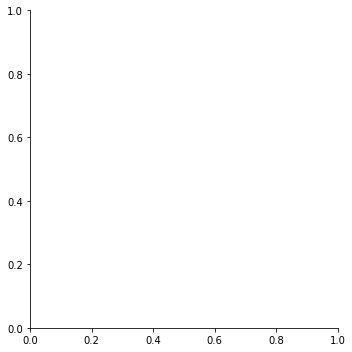

In [27]:
sns.lmplot('age', 'y', data=data, fit_reg=True)
sns.lmplot('campaign', 'y', data=data, fit_reg=True)
sns.lmplot('pdays', 'y', data=data, fit_reg=True)
sns.lmplot('previous', 'y', data=data, fit_reg=True)

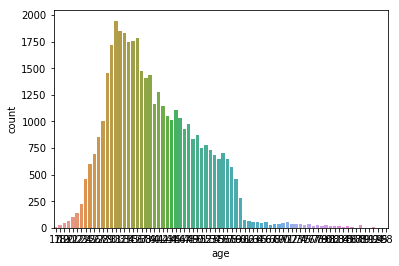

In [28]:
sns.countplot('age', data=data)

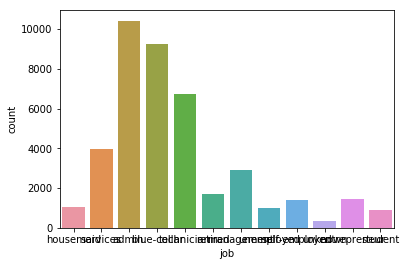

In [34]:
sns.countplot('job', data=data)

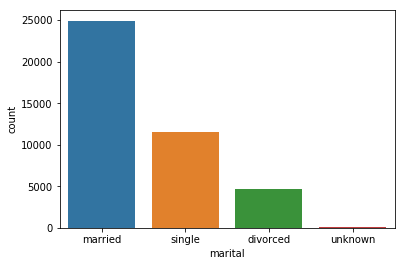

In [35]:
sns.countplot('marital', data=data)

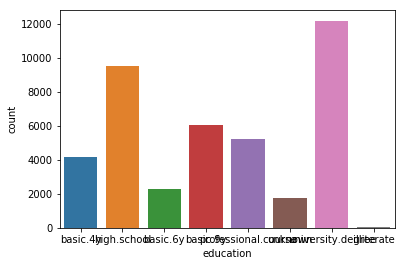

In [36]:
sns.countplot('education', data=data)

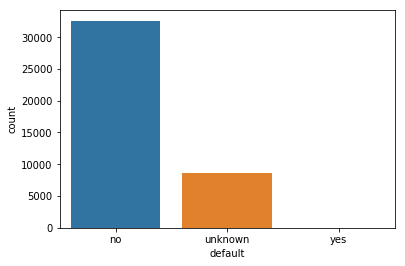

In [38]:
sns.countplot('default', data=data)

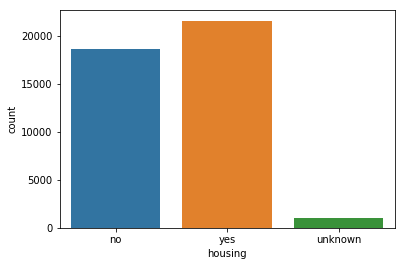

In [40]:
sns.countplot('housing', data=data)

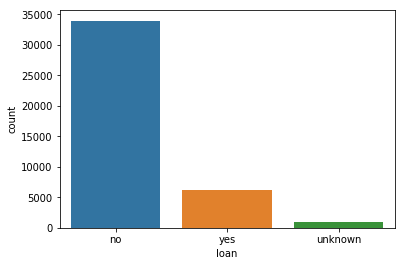

In [42]:
sns.countplot('loan', data=data)

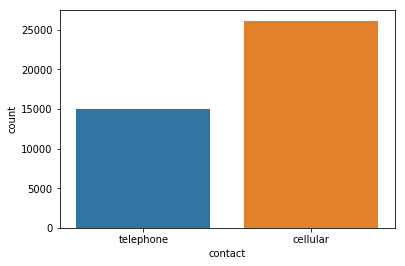

In [43]:
sns.countplot('contact', data=data)

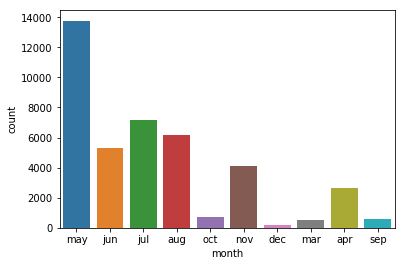

In [44]:
sns.countplot('month', data=data)

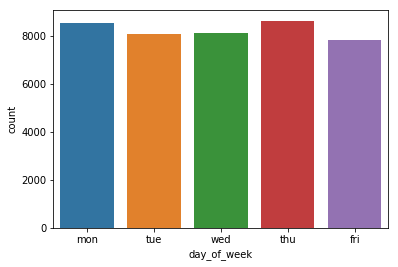

In [46]:
sns.countplot('day_of_week', data=data)

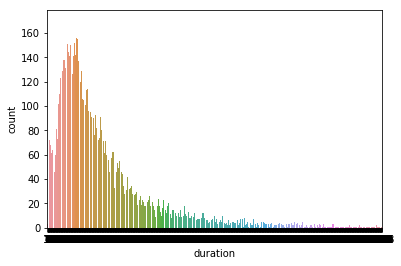

In [48]:
sns.countplot('duration', data=data)

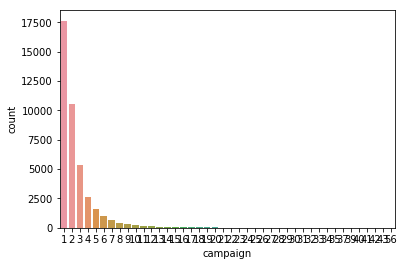

In [49]:
sns.countplot('campaign', data=data)

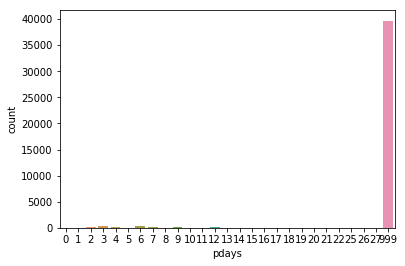

In [50]:
sns.countplot('pdays', data=data)

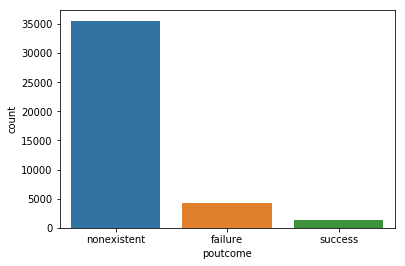

In [51]:
sns.countplot('poutcome', data=data)

In [ ]:
sns.countplot('poutcome', data=data)

C:\Users\Yoganand\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: can't multiply sequence by non-int of type 'float'

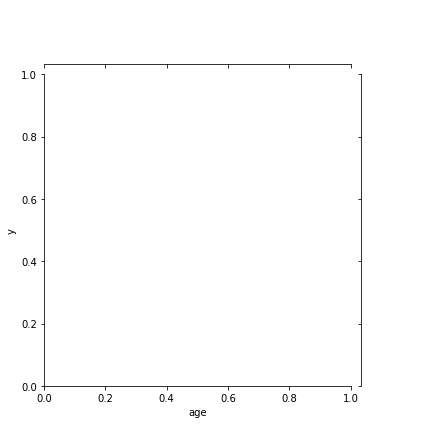

In [19]:
sns.jointplot('age', 'y', data=data, kind='hex')
sns.jointplot('campaign', 'y', data=data, kind='hex')
sns.jointplot('pdays', 'y', data=data, kind='hex')
sns.jointplot('previous', 'y', data=data, kind='hex')

In [20]:
sns.violinplot(x=data.default, y=data.y, hue=data.smoker, data=data, palatte='muted',split=True)

AttributeError: 'DataFrame' object has no attribute 'smoker'